In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!wget https://raw.githubusercontent.com/karpathy/makemore/refs/heads/master/names.txt
words = open('names.txt', 'r').read().splitlines()
words[:8]

--2025-01-31 20:50:00--  https://raw.githubusercontent.com/karpathy/makemore/refs/heads/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>] 222.80K  --.-KB/s    in 0.03s   

2025-01-31 20:50:01 (8.01 MB/s) - ‘names.txt’ saved [228145/228145]



['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
#build the vocab of chars and mapping to and from ints
chars = sorted(list(set(''.join(words)))) # sorted list of all unique chars in dataset
stoi = {s:i+1 for i,s in enumerate(chars)} # string to int mapping
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()} # int to string mapping
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [4]:
#building the dataset

def build_dataset(words):
  block_size = 3 # context length -> how many previous chars we are using to predict the next
  X, Y = [], []
  for w in words:
      #print(w)
      context = [0] * block_size
      for ch in w + '.':
          ix = stoi[ch]
          X.append(context)
          Y.append(ix)
          #print(''.join(itos[i] for i in context), '--->', itos[ix])
          context = context[1:] + [ix] # crop and append
  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2]) # dev == validation
Xte, Yte = build_dataset(words[n2:])


torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [7]:
Xtr.shape, Xtr.dtype, Ytr.shape, Ytr.dtype

(torch.Size([182625, 3]), torch.int64, torch.Size([182625]), torch.int64)

All notes no work done here

In [8]:
C = torch.randn(27,2)

In [10]:
C[X].shape

NameError: name 'X' is not defined

In [ ]:
X[13,2]

tensor(1)

In [ ]:
C[X][13,2]

tensor([-0.2323, -0.2816])

In [ ]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [ ]:
W1 = torch.randn((6,100))
b1 = torch.randn(100)

In [ ]:
torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]], dim=1).shape # taking the 32 by 3 by 2 matrix of embeddings and squashing it into 32 by 6 so we can multiply by the weights(W1) and add the biases(b1)

torch.Size([32, 6])

In [ ]:
torch.cat(torch.unbind(emb, dim=1), dim=1).shape #same as above but will work if we change the block size

torch.Size([32, 6])

In [ ]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [ ]:
a.view(3,3, 2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [ ]:
a.storage() # how tensors are represnted in memory, since its one dim it means we dont have to do any fancy operations to concatinate we can just veiw it as a diff dimension tensor

<ipython-input-35-0bf202d54d8f>:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage() # how tensors are represnted in memory


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [ ]:
emb.view(32,6) == torch.cat(torch.unbind(emb, dim=1), dim=1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [ ]:
# we dont have to do anything fancy to multiply by weifhts and add biases we ca just do
h = torch.tanh(emb.view(emb.shape[0],6) @ W1 +b1)

In [ ]:
h.shape

torch.Size([32, 100])

In [ ]:
h

tensor([[-0.6034,  0.8884, -0.6012,  ..., -0.9954, -0.9982,  1.0000],
        [ 0.9950, -0.0866, -0.9995,  ..., -0.9985,  0.9979,  0.9997],
        [ 0.9998, -1.0000,  0.0354,  ..., -0.9991, -0.0493,  1.0000],
        ...,
        [ 0.7035,  0.8655,  0.6683,  ..., -0.8911, -0.9974,  0.9987],
        [ 0.7356,  0.9876,  0.9654,  ...,  0.4594, -0.9851,  0.9982],
        [-0.6157,  0.9650,  0.3113,  ..., -0.9300, -0.2743,  0.9999]])

In [ ]:
W2 = torch.randn((100,27))
b2 = torch.randn(27)

In [ ]:
logits = h @ W2 + b2

In [ ]:
logits.shape

torch.Size([32, 27])

In [ ]:
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)
prob.shape
 ## cross_entropy does this but better + the neg log likelyhood part

torch.Size([32, 27])

In [ ]:
loss = -prob[torch.arange(32), Y].log().mean() # negative log likelyhood
loss

tensor(16.4801)

no longer notes

In [11]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [24]:
g = torch.Generator().manual_seed(2147483647) # for repeducibility
C = torch.randn((27, 10), generator=g) # 27 for amount of chars, 10 for emedding demension of each char
W1 = torch.randn((30, 200), generator=g) # 30 inputs for each nueron and 200 nuerons for the diden ;ater
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [25]:
sum(p.nelement() for p in parameters) # number of total parameters across all the tensors

11897

In [26]:
for p in parameters:
  p.requires_grad = True

In [28]:
# finding good learning rate
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre # since 10^0 is 1 this essentially gives us a linear set of numbers between 0 and 1, learning rates
lri = []
lossi = []
stepi = []

In [33]:

for i in range(50000):
  #minbatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,)) # using minibatches help us train faster

  #forward pass
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(emb.shape[0], 30) @ W1 +b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 100)
  loss = F.cross_entropy(logits, Ytr[ix]) # same thing as above but WAY BETTER
  # backward pass
  # set the gradients to zero
  for p in parameters:
    p.grad = None
  loss.backward() ## populate those gradients

  #update
  lr = .1 # we determined this was the best throught the tracking
  for p in parameters:
    p.data += -lr * p.grad #learning rate

  #track the learning rate stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

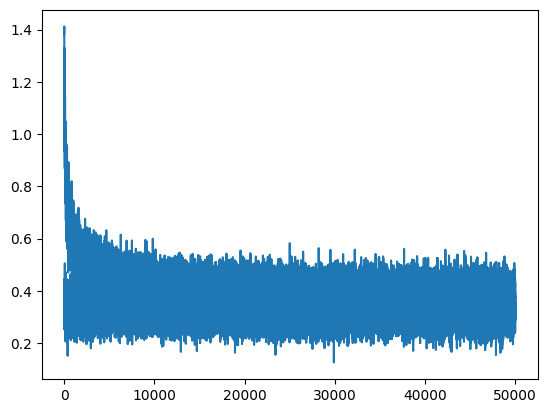

In [34]:
plt.plot(stepi, lossi) # visualize the loss

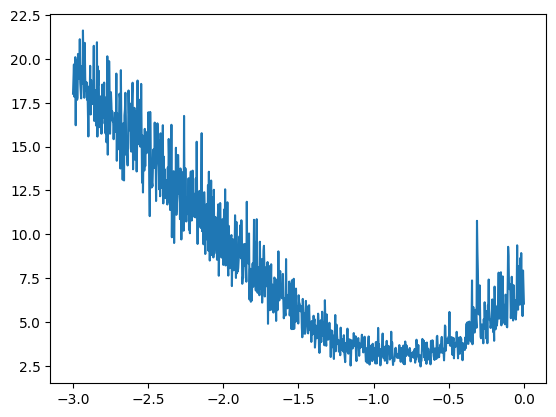

In [ ]:
plt.plot(lri, lossi)

- reason loss is so low when we have only 32 examples to train on is bc we have a neural net with alot more parameters, this means we are overfitting the data.
- Overfitting is bas because altough the model is very familiar with the data it was trained on it wont be able to understand new data.
- this is why we try to avoid overfitting and split the data into the training, validation, and testing
- the training split is around 80% of the data and is used to optimize the paramters of the model(aka thoes nuerons)
- the validation split is around 10% of the data and is used for development over all of the hyperparmeters(learning rate, batch size, number of training runs, amount of hidden layers) of the model
- the test split, the last 10% of the data is used to evaluate how effective the model is at the end.(you can only use the test split very few times or the model will start to train on it, resulting in overfitting)

In [35]:
#training loss
emb = C[Xtr]
h = torch.tanh(emb.view(-1,30) @ W1 +b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1806, grad_fn=<NllLossBackward0>)

In [36]:
#dev loss
emb = C[Xdev]
h = torch.tanh(emb.view(-1,30) @ W1 +b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.2024, grad_fn=<NllLossBackward0>)

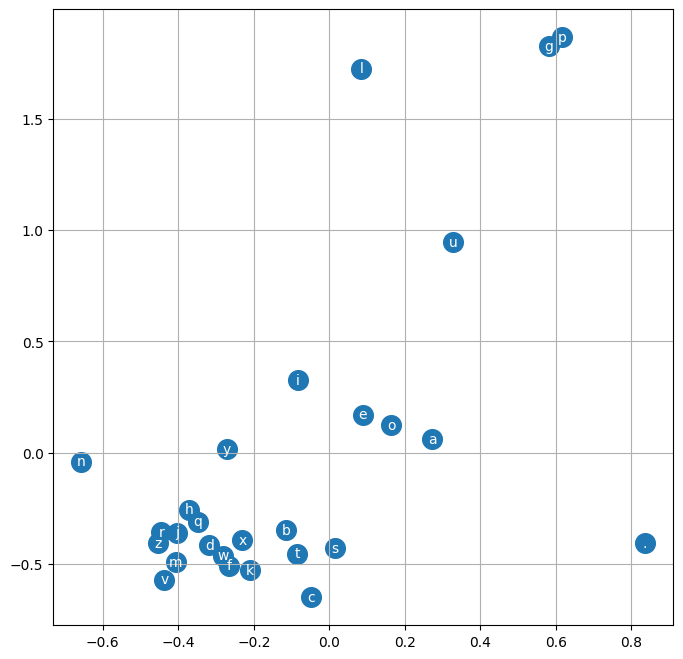

In [21]:
##visuallizing the embedding(only works if its 2D emdebedding)
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
  plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor')

In [42]:
#sampling from the model
block_size = 3
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
  out = []
  context = [0] * block_size # initialize with all
  while True:
    emb = C[torch.tensor([context])]# (1, block_size, d)
    h = torch.tanh(emb.view(1,-1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1, generator=g).item() # samples from the probabilitys to get the nxt index/char
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
      break

  print(''.join(itos[i] for i in out))

mora.
mayanniee.
med.
rylle.
emmaniendrlee.
aderedielin.
shi.
jenredenneson.
araelynn.
hoka.
miyshabergiai.
jest.
jairendy.
panthona.
ummered.
ruyah.
fiel.
yuma.
mys.
kyla.
